<a href="https://colab.research.google.com/github/cunov/ML-for-NLP/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/NLP course/Assignment-1

/content/drive/MyDrive/NLP course/Assignment-1


In [ ]:
import collections
from collections import Counter,defaultdict
from matplotlib import pyplot as plt


In [ ]:
base = '/content/drive/MyDrive/NLP course/Assignment-1/a1_data/'
filename = ['books.txt' , 'europarl.txt','wikipedia.txt']
encodings = 'utf-8'

In [ ]:
def freq_counter(YOUR_FILE,ENCODING):
  
  freqs = Counter()
  with open(YOUR_FILE, encoding=ENCODING) as f:
      for line in f:
        tokens = line.lower().split()
        for token in tokens:
            freqs[token] += 1
  for word, freq in freqs.most_common(10):
      print(word, freq)

  
      


In [ ]:
file = base+filename[2]
freq_counter(file,encodings)

the 3158463
, 2566261
. 1956600
of 1534698
and 1260516
in 1205759
a 958283
to 926287
- 548244
is 522101


In [ ]:
def freq_table(YOUR_FILE,ENCODING):
  freqs = defaultdict(Counter)
  with open(YOUR_FILE, encoding=ENCODING) as f:
      for line in f:
        tokens = line.lower().split()
        for t1, t2 in zip(tokens, tokens[1:]):
            freqs[t1][t2] += 1    
  return freqs

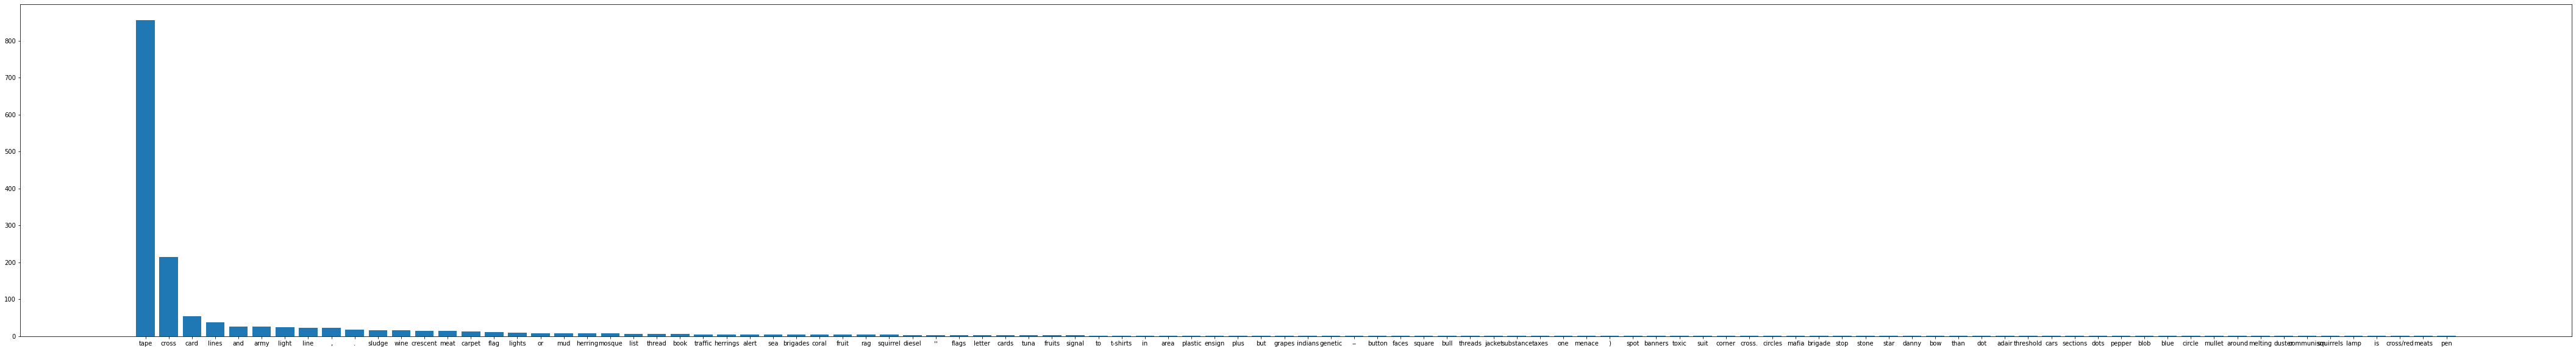

In [ ]:
for f_n in range(1,2):
  file = base+filename[f_n]
  freq = freq_table(file,encodings)
  most_common = freq['red'].most_common(100)
  char,count = zip(*most_common)
  plt.figure(figsize=(75,10))
  plt.plo(char,count)


In [ ]:
most_common = freq['red'].most_common(100)

In [ ]:
char,count = zip(*most_common)

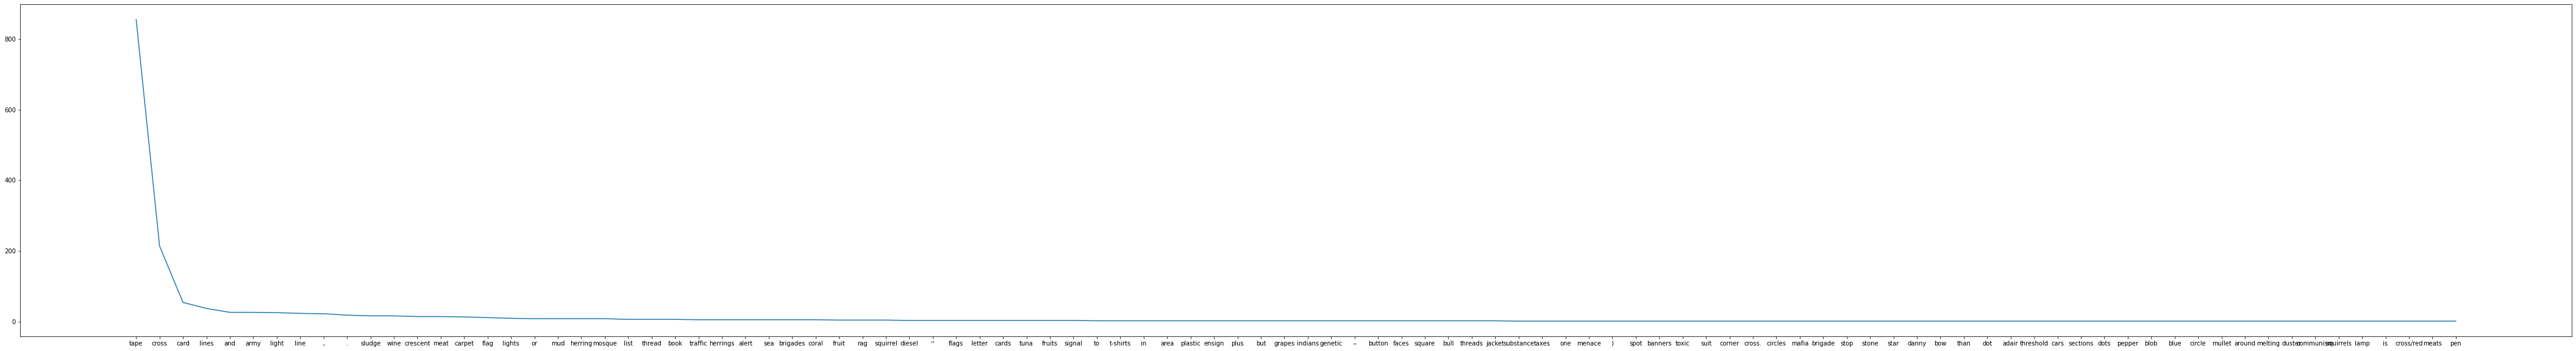

In [ ]:
plt.figure(figsize=(75,10))
plt.plot(char,count)

In [ ]:
a

','

NLP Toolkit 

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
example = 'Apple bought two companies this year and no one knew, Mark Gurman at 9to5Mac reports.'
result = nlp(example)

In [ ]:
result

Apple bought two companies this year and no one knew, Mark Gurman at 9to5Mac reports.

In [ ]:
from spacy import displacy
displacy.render(result, style='dep', jupyter=True)

In [ ]:
html = displacy.render(result, style='dep', page=True)



In [ ]:
num=0
for token in result:
    num = num+1
    print(num)
    print("Text:",token.text)
    print("pos:",token.pos_)
    print("lemma:",token.lemma_)
    print("head:",token.head)
    print("dep:",token.dep_)

1
Text: Apple
pos: PROPN
lemma: Apple
head: bought
dep: nsubj
2
Text: bought
pos: VERB
lemma: buy
head: bought
dep: ROOT
3
Text: two
pos: NUM
lemma: two
head: companies
dep: nummod
4
Text: companies
pos: NOUN
lemma: company
head: bought
dep: dobj
5
Text: this
pos: DET
lemma: this
head: year
dep: det
6
Text: year
pos: NOUN
lemma: year
head: bought
dep: npadvmod
7
Text: and
pos: CCONJ
lemma: and
head: bought
dep: cc
8
Text: no
pos: DET
lemma: no
head: one
dep: det
9
Text: one
pos: NOUN
lemma: one
head: knew
dep: nsubj
10
Text: knew
pos: VERB
lemma: know
head: bought
dep: conj
11
Text: ,
pos: PUNCT
lemma: ,
head: knew
dep: punct
12
Text: Mark
pos: PROPN
lemma: Mark
head: Gurman
dep: compound
13
Text: Gurman
pos: PROPN
lemma: Gurman
head: knew
dep: npadvmod
14
Text: at
pos: ADP
lemma: at
head: knew
dep: prep
15
Text: 9to5Mac
pos: NUM
lemma: 9to5mac
head: at
dep: pobj
16
Text: reports
pos: NOUN
lemma: report
head: at
dep: pobj
17
Text: .
pos: PUNCT
lemma: .
head: knew
dep: punct


In [ ]:
for entity in result.ents:
    print(entity.label_)


ORG
CARDINAL
DATE
PERSON
CARDINAL


Side Show Preprocessing

In [ ]:
class Vocab:
  def __init__(self,dataset,max_voc_size=1000,batch_size=8):
    print(dataset,"data")
    self.dataset = dataset
    self.max_voc_size = max_voc_size
    freqs = Counter()
    tokens = dataset.lower().split()
    
    for token in tokens:
        freqs[token] += 1
    voc_size = len(freq)    
    if voc_size > max_voc_size:
      voc_size = max_voc_size
      freqs = dataset.most_common[voc_size]  


    



In [ ]:
dataset =  base+filename[2]

with open(dataset) as f:
  dataset = f.read()
  voc = Vocab(dataset,max_voc_size=1000, batch_size=8)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



790906 freq len
